# Proyecto ML. Show/ No Show

In [1]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Describe the Dataset

In [2]:
citas = pd.read_csv('../data/show_no_show.csv')

In [3]:
#Look at the first five rows of all variables to evaluate the categorical variables as well
citas.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No


In [4]:
#Look at the variables and their types
citas.dtypes

Unnamed: 0          int64
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism         object
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#Examine the descriptive statistics of the numeric variables
citas.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Handcap,SMS_received
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,1.474963e+14,5.675305e+06,37.049029,0.098266,0.197246,0.071865,0.022248,0.321026
std,31906.540939,2.560949e+14,7.129575e+04,23.524663,0.297675,0.397921,0.258265,0.161543,0.466873
min,0.000000,3.921784e+04,5.030230e+06,-232.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55263.000000,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82894.500000,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,110526.000000,9.999816e+14,5.790484e+06,310.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Handle the Missing Data

In [6]:
citas.isnull().any(axis=1).sum()

345

In [7]:
missing_values = citas[citas.isnull().any(axis=1)]
missing_values.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
73,73,4.542132e+13,5552934,NaN,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,None,0,1,No
416,416,3.987252e+14,5496971,NaN,2016-03-21T15:22:03Z,2016-04-29T00:00:00Z,32,ITARARÉ,0,0,0,None,0,1,No
603,603,7.351714e+14,5504986,NaN,2016-03-23T08:42:08Z,2016-04-29T00:00:00Z,58,ITARARÉ,0,0,0,None,0,1,No
725,725,3.498990e+11,5638769,NaN,2016-04-29T08:24:02Z,2016-04-29T00:00:00Z,68,CENTRO,0,1,0,None,0,0,No
738,738,2.385829e+12,5638933,NaN,2016-04-29T08:36:00Z,2016-04-29T00:00:00Z,3,JABOUR,0,0,0,None,0,0,No


## Data cleaning

### Estrategia

In [21]:
def cat_column_analysis (df, col):
    
    """
    Dada un columna devuelve información relacionada con nulos y distribución.
    
    Inputs:
    df. datafrme
    col. nombre de la columna
    
    Output:
    -Valores nulos y su ratio si hay.
    -% de cada valor
    -bar plot
    
    """
    
    df_temp = pd.DataFrame(df[col])
    
    #Valores nulos
    if df[col].isnull().sum()>0:  
        print(f"Valores nulos: {df[col].isnull().sum()}. Un {round((df[col].isnull().sum()/len(df[col])*100),2)}%")
        df_temp[col] = df[col].fillna("NaN")
    else:
        print("No hay valores nulos.")
        
    # % según los valores únicos    
    print("Ratio de valores:")
    cd = pd.DataFrame(df_temp[col].value_counts())
    cd["%"] = [round((cd[col][value]/cd[col].sum()),4)*100 for value in cd.index]
    print(cd)
    
    #Visualización de la distribución
    print("Distribución:")
    display(df_temp[col].hist())
    plt.show()
    
    print('\n')
    
    #mostrar el impacto de las distintos valores de la variable en el target (No-show)
    df_temp2 = pd.DataFrame(citas[[col,'No-show']])

    print(f"Impacto de {col} en No-shows:")

    df_temp2 = df_temp2.groupby([col,'No-show']).agg({col:'count'})
    df_temp2['%'] = [round((df_temp2[col][value]/df_temp2[col][df_temp2.index.get_level_values(0)==value[0]].sum())*100,2)
    for value in df_temp2.index]
    print(df_temp2)

    


### Análisis

#### Gender

Valores nulos: 345. Un 0.31%
Ratio de valores:
     Gender      %
F     71607  64.79
M     38575  34.90
NaN     345   0.31
Distribución:


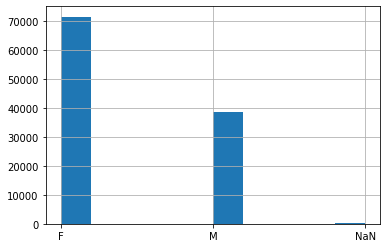



Impacto de Gender en No-shows:
                Gender      %
Gender No-show               
F      No        57067  79.69
       Yes       14540  20.31
M      No        30884  80.06
       Yes        7691  19.94


In [9]:
cat_column_analysis (citas, "Gender")

La proporción de valores nulos es pequeña. Al tratarse de una categoria binaria podríamos remplazarlos en proporción a los otros dos valores o crear una nueva categoría de NAs para ver si la gente que no facilita los datos también es la que acabar por no acudir a las citas.

La diferencia es relativamente pequeña pero nos indica que las mujeres son un poco mas propensas a hacer No-shows (no se si es suficientemente significativo cómo para considerarlo)

#### Alcoholism

No hay valores nulos.
Ratio de valores:
          Alcoholism      %
None          107167  96.96
Low             1129   1.02
Moderate        1118   1.01
High            1113   1.01
Distribución:


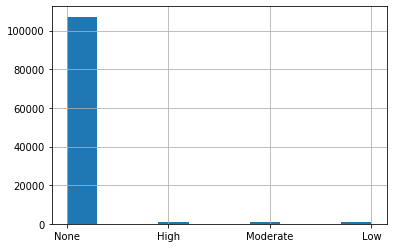



Impacto de Alcoholism en No-shows:
                    Alcoholism      %
Alcoholism No-show                   
High       No              879  78.98
           Yes             234  21.02
Low        No              899  79.63
           Yes             230  20.37
Moderate   No              905  80.95
           Yes             213  19.05
None       No            85525  79.81
           Yes           21642  20.19


In [10]:
cat_column_analysis (citas, "Alcoholism")

A pesar de lo que en un principio pensamos que podría ser un atributo categórico binario, haciendo una exploración vemos que es categórico ordinal. Podríamos transformarla a numérico.

A primera vista diríamos que el nivel de alcohlismo no impacta en los No-shows. El 96% de los datos estan dentro del rango None y para High, Low y Moderate la muestra de datos es muy pequeña y aún así muy cercana al valor de los None

#### No-show

In [11]:
#cat_column_analysis (citas, "No-show")

Se me hace un poco raro que el "Sí" sean los que no vienen...

#### Scholarship

No hay valores nulos.
Ratio de valores:
   Scholarship      %
0        99666  90.17
1        10861   9.83
Distribución:


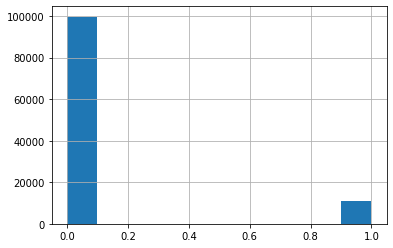



Impacto de Scholarship en No-shows:
                     Scholarship      %
Scholarship No-show                    
0           No             79925  80.19
            Yes            19741  19.81
1           No              8283  76.26
            Yes             2578  23.74


In [22]:
cat_column_analysis (citas,'Scholarship')

A pesar de que el porcentaje de Scholarship es bajo (9.83%), es suficiente para poder decir que la gente con Scholarship = 1 son mas propensos a hacer un No-show

No hay valores nulos.
Ratio de valores:
   Hipertension      %
0         88726  80.28
1         21801  19.72
Distribución:


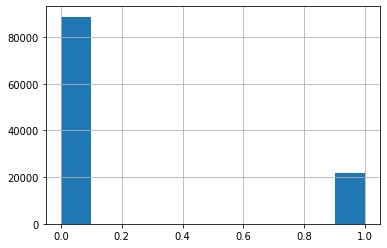



Impacto de Hipertension en No-shows:
                      Hipertension     %
Hipertension No-show                    
0            No              70179  79.1
             Yes             18547  20.9
1            No              18029  82.7
             Yes              3772  17.3


In [13]:
cat_column_analysis (citas,'Hipertension')

La gente con hipertension representa un 20% de la muestra con lo que la podemos considerar significativa. Podemos observar que la gente con hipertensión hace menos No-shows que la gente sin.

No hay valores nulos.
Ratio de valores:
   Diabetes      %
0    102584  92.81
1      7943   7.19
Distribución:


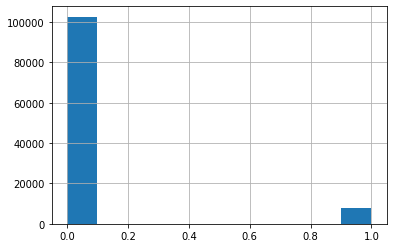



Impacto de Diabetes en No-shows:
                  Diabetes      %
Diabetes No-show                 
0        No          81695  79.64
         Yes         20889  20.36
1        No           6513  82.00
         Yes          1430  18.00


In [23]:
cat_column_analysis (citas,'Diabetes')

La gente con Diabetes representa un 7% de la muestra. Podemos observar que la gente con Diabetes hace menos No-shows que la gente sin.

No hay valores nulos.
Ratio de valores:
   Handcap      %
0   108286  97.97
1     2042   1.85
2      183   0.17
3       13   0.01
4        3   0.00
Distribución:


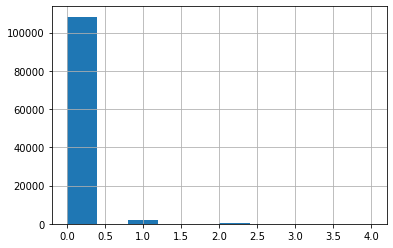



Impacto de Handcap en No-shows:
                 Handcap      %
Handcap No-show                
0       No         86374  79.76
        Yes        21912  20.24
1       No          1676  82.08
        Yes          366  17.92
2       No           146  79.78
        Yes           37  20.22
3       No            10  76.92
        Yes            3  23.08
4       No             2  66.67
        Yes            1  33.33


In [15]:
cat_column_analysis (citas,'Handcap')

De las categorias 2, 3 y 4 de Handcap no nos atreveriamos a decir nada ya que la muestra no es significativa. Por otro lado aunque la de Handcap 1 solo representa el ~2% vemos que puede ser significativo su impacto en los No-shows

### PatientId

In [16]:
citas['PatientId'] = citas['PatientId'].astype(int)

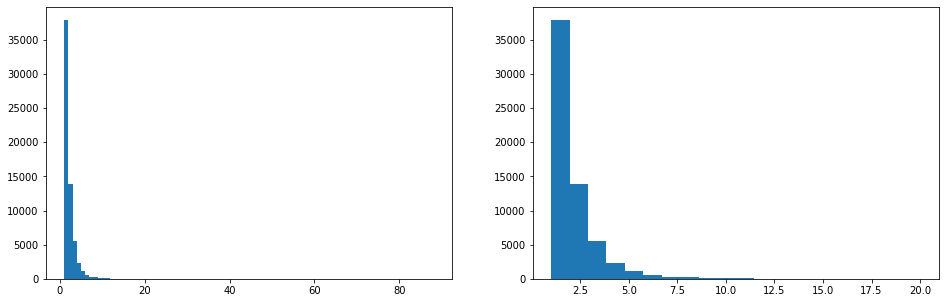

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,5)

x1 = appointments_per_patient_id['AppointmentID']
x2 = appointments_per_patient_id['AppointmentID'][appointments_per_patient_id['AppointmentID']<=20]


axs[0].hist(x1, bins=88)
axs[1].hist(x2, bins=20)

plt.show()
